# **Laboratorio N°4: Número de Condición**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)$

In [7]:
??np.linalg.cond

Signature: np.linalg.cond(x, p=None)
Source:   
@array_function_dispatch(_cond_dispatcher)
def cond(x, p=None):
    """
    Compute the condition number of a matrix.

    This function is capable of returning the condition number using
    one of seven different norms, depending on the value of `p` (see
    Parameters below).

    Parameters
    ----------
    x : (..., M, N) array_like
        The matrix whose condition number is sought.
    p : {None, 1, -1, 2, -2, inf, -inf, 'fro'}, optional
        Order of the norm used in the condition number computation:

        =====  ============================
        p      norm for matrices
        =====  ============================
        None   2-norm, computed directly using the ``SVD``
        'fro'  Frobenius norm
        inf    max(sum(abs(x), axis=1))
        -inf   min(sum(abs(x), axis=1))
        1      max(sum(abs(x), axis=0))
        -1     min(sum(abs(x), axis=0))
        2      2-norm (largest sing. value)
        -2     sm

In [2]:
import numpy as np

In [15]:
A = np.array([[1,2],[3,4]])
B = -1*np.array([[1,2],[3,4]])

print(np.linalg.cond(A, p=2))
print(np.linalg.cond(B, p=2))
print(np.linalg.cond(A + B, p=2))

14.933034373659268
14.933034373659268
inf


**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

In [18]:
A = np.array([[1,2],[3,4]])
B = np.array([[1,2],[3,4]])

print(np.linalg.cond(A, p=2))
print(np.linalg.cond(B, p=2))
print(np.linalg.cond(A - B, p=2))

14.933034373659268
14.933034373659268
inf


**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

In [20]:
A = np.array([[1,2],[3,4]])
B = -1 * np.array([[1,2],[3,4]])

cA = np.linalg.cond(A, p=2)
cB = np.linalg.cond(B, p=2)

print("prod:", cA*cB)
print(np.linalg.cond(A @ B, p=2))

prod: 222.99551560488925
214.49533789400732


## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array.




In [21]:
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

In [30]:
def matriz_A(n):
    A = 1/n * np.eye(n)
    A[n-1,0] = 1
    A[0,n-1] = n**2
    return A
matriz_A(5)

array([[ 0.2,  0. ,  0. ,  0. , 25. ],
       [ 0. ,  0.2,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.2,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.2,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0.2]])

In [46]:
def matriz_H(n):
    ind_row, ind_col = np.indices((n, n))
    T = 1 + ind_row + ind_col
    H = 1/T
    return H
matriz_H(5)

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]])

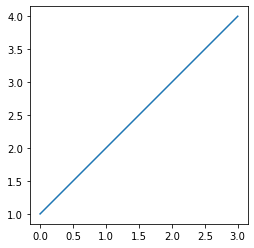

In [33]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.gca().set_aspect('equal')

**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

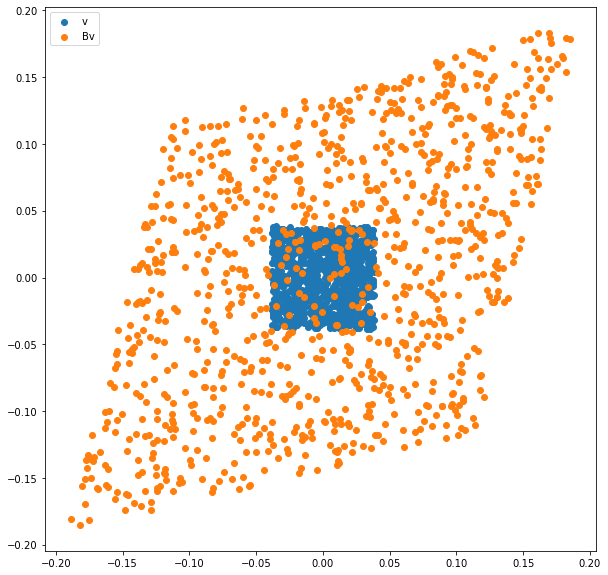

In [74]:
n = 2

A = matriz_A(n) 
B = matriz_B(n)
H = matriz_H(n)

V = np.random.rand(n, 1000) - 0.5
V = V / np.linalg.norm(V)

AV = A @ V
BV = B @ V
HV = H @ V

plt.figure(figsize=(10,10))

plt.scatter(V[0], V[1], label = "v")
plt.scatter(BV[0], BV[1], label = "Bv")

plt.legend()
plt.gca().set_aspect('equal')
plt.show()



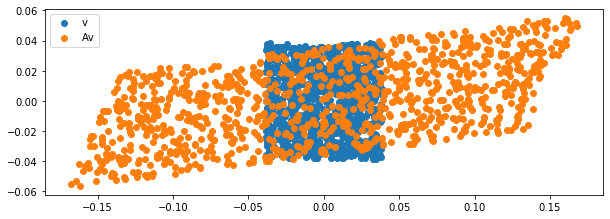

In [75]:

plt.figure(figsize=(10,10))

plt.scatter(V[0], V[1], label = "v")
plt.scatter(AV[0], AV[1], label = "Av")

plt.legend()
plt.gca().set_aspect('equal')
plt.show()



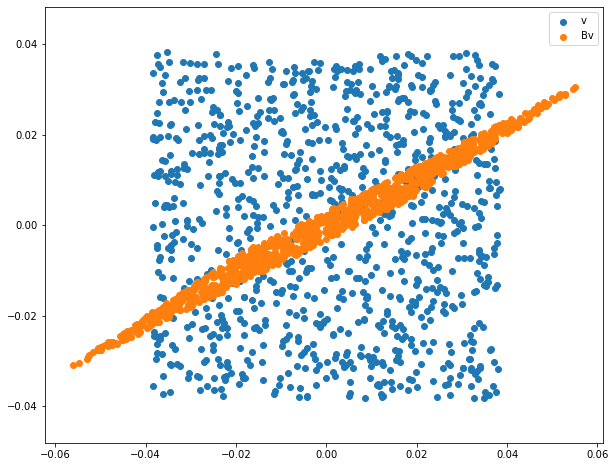

In [76]:

plt.figure(figsize=(10,10))

plt.scatter(V[0], V[1], label = "v")
plt.scatter(HV[0], HV[1], label = "Bv")

plt.legend()
plt.gca().set_aspect('equal')
plt.show()



**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [77]:
def vector_condicion(M, N):
  res = []
  for i in range(1,N+1):
    Mn = M(i)
    cond_i = np.linalg.cond(Mn)
    res.append(cond_i)
  return res

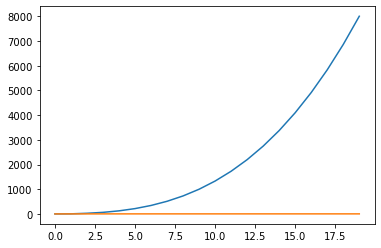

**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


[]

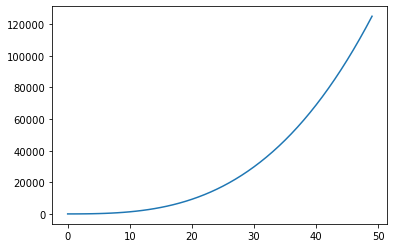

In [98]:
n=50
conditions_A = vector_condicion(matriz_A, n)
conditions_B = vector_condicion(matriz_B, n)
conditions_H = vector_condicion(matriz_H, n)

plt.plot(conditions_A)
plt.plot()

[]

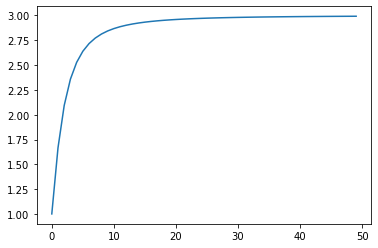

In [99]:
plt.plot(conditions_B)
plt.plot()

[]

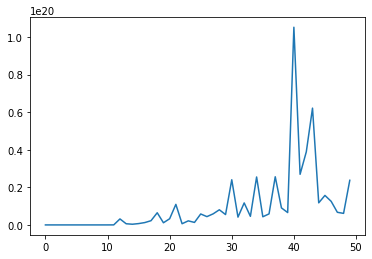

In [100]:
plt.plot(conditions_H)
plt.plot()

**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (d) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

In [ ]:
#COMPLETAR

## Ejercicio 3 (Ej 20 - Práctica 2)

Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [ ]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 4/5]])

(a) Calcular $Cond_\infty(A)$.


In [ ]:
#COMPLETAR

(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)?



In [ ]:
#COMPLETAR

(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.

In [ ]:
#COMPLETAR